<a href="https://colab.research.google.com/github/aldireza/mangga_knn/blob/main/Klasifikasi_Mangga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from imutils import paths
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt
import zipfile,os
import numpy as np
import argparse
import imutils
import cv2
import os
import pandas as pd

In [3]:
local_zip = 'Apel.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dataset')
zip_ref.close()

local_zip = 'Arum Manis.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dataset')
zip_ref.close()

local_zip = 'Budi Raja.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dataset')
zip_ref.close()

local_zip = 'Jamadar.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dataset')
zip_ref.close()

local_zip = 'Langdo.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dataset')
zip_ref.close()

local_zip = 'Manalagi.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dataset')
zip_ref.close()

local_zip = 'Rajapuri.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dataset')
zip_ref.close()

In [4]:
main_dir = 'dataset'

apel_dir = os.path.join(main_dir, 'Apel')
arum_manis_dir = os.path.join(main_dir, 'Arum Manis')
budi_raja_dir = os.path.join(main_dir, 'Budi Raja')
jamadar_dir = os.path.join(main_dir, 'Jamadar')
langdo_dir = os.path.join(main_dir, 'Langdo')
manalagi_dir = os.path.join(main_dir, 'Manalagi')
rajapuri_dir = os.path.join(main_dir, 'Rajapuri')

print('Apel : ' + str(len(os.listdir(apel_dir))) + ' gambar')
print('Arum Manis : ' + str(len(os.listdir(arum_manis_dir))) + ' gambar')
print('Budi Raja : ' + str(len(os.listdir(budi_raja_dir))) + ' gambar')
print('Jamadar : ' + str(len(os.listdir(jamadar_dir))) + ' gambar')
print('Langdo : ' + str(len(os.listdir(langdo_dir))) + ' gambar')
print('Manalagi : ' + str(len(os.listdir(manalagi_dir))) + ' gambar')
print('Rajapuri : ' + str(len(os.listdir(rajapuri_dir))) + ' gambar')

Apel : 59 gambar
Arum Manis : 63 gambar
Budi Raja : 95 gambar
Jamadar : 98 gambar
Langdo : 85 gambar
Manalagi : 53 gambar
Rajapuri : 77 gambar


In [5]:
def image_to_feature_vector(image, size=(32, 32)):
	  return cv2.resize(image, size).flatten()

def extract_color_histogram(image, bins=(3, 3, 3)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,[0, 180, 0, 256, 0, 256])
    if imutils.is_cv2():
        hist = cv2.normalize(hist)
    else:
        cv2.normalize(hist, hist)
    return hist.flatten()

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_colors(image, number_of_colors):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]

    data = [ordered_colors, labels, hex_colors, rgb_colors]
    
    return data

def show_chart(labels, hex_colors, ordered_colors):

    new_counter = []
    for i in range(0, len(attr[1])):
        if attr[1][i] != 0:
          new_counter.append(attr[1][i])

    counts = Counter(new_counter)

    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)

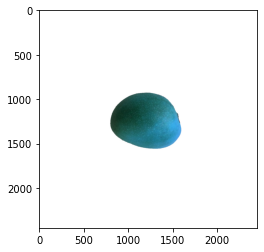

In [7]:
test_image = cv2.imread(apel_dir + '/IMG_5303.jpg')
plt.imshow(test_image)

In [8]:
attr = get_colors(test_image, 8)
attr

[[array([0.99992202, 0.99994134, 0.99994905]),
  array([0.65577894, 0.74329445, 0.7706296 ]),
  array([0.19849872, 0.55708835, 0.66286951]),
  array([0.15502293, 0.47249372, 0.52527016]),
  array([0.12984473, 0.39711112, 0.39557818]),
  array([0.09803773, 0.32433347, 0.29438196]),
  array([0.07984512, 0.23927989, 0.18659284]),
  array([0.24358336, 0.63520593, 0.83219732])],
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 ['#fefefe',
  '#18524b',
  '#216564',
  '#a7bdc4',
  '#143d2f',
  '#277885',
  '#3ea1d4',
  '#328ea9'],
 [array([254.98011408, 254.98504208, 254.98700882]),
  array([24.99962136, 82.70503597, 75.06739871]),
  array([ 33.11040656, 101.26333458, 100.87243566]),
  array([167.22362869, 189.54008439, 196.51054852]),
  array([20.36050477, 61.01637108, 47.58117326]),
  array([ 39.53084606, 120.48589894, 133.94388954]),
  array([ 62.11375661, 161.97751323, 212.21031746]),
  array([ 50.61717428, 142.05752961, 169.03172589])]]

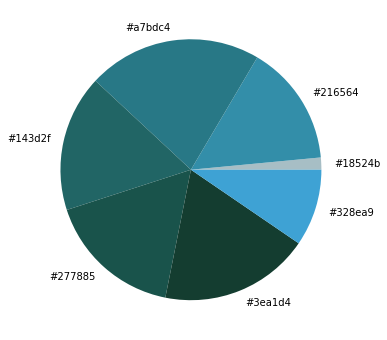

In [9]:
show_chart(attr[1], attr[2][1:], attr[0][1:])

In [10]:
test_hist = extract_color_histogram(test_image)
test_hist

array([1.4272303e-04, 3.8767140e-04, 9.9943370e-01, 7.1536349e-03,
       1.0281231e-02, 2.9136906e-03, 1.3403476e-02, 2.6711507e-02,
       8.5801510e-03, 0.0000000e+00, 0.0000000e+00, 4.8169022e-05,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       6.5117383e-05, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00], dtype=float32)

In [13]:
datagen_apel = []
for i in range(0,len(os.listdir(apel_dir))):
  image = cv2.imread(apel_dir +'/'+ os.listdir(apel_dir)[i])
  hist = extract_color_histogram(image)
  datagen_apel.append(hist)

df_apel = pd.DataFrame(datagen_apel)
df_apel['label'] = 'apel'
df_apel

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,label
0,1.041131e-04,0.000616,0.998880,0.008284,0.042040,0.008924,0.001112,0.010332,0.014640,0.000000e+00,0.0,0.000044,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000100,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel
1,1.541782e-04,0.000482,0.999552,0.000579,0.017124,0.003527,0.000018,0.012165,0.021035,0.000000e+00,0.0,0.000040,0.0,0.0,0.0,0.0,0.0,0.0,1.760025e-07,0.000000e+00,0.000055,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel
2,6.006889e-06,0.000203,0.998197,0.000293,0.003163,0.013728,0.000692,0.019321,0.055049,0.000000e+00,0.0,0.000079,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000102,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel
3,1.453562e-06,0.000333,0.998172,0.000777,0.004151,0.006361,0.001444,0.021446,0.055965,0.000000e+00,0.0,0.000090,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000106,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel
4,4.358575e-06,0.000185,0.998351,0.000010,0.004970,0.013334,0.000014,0.019005,0.052260,0.000000e+00,0.0,0.000086,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000100,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel
5,1.800858e-07,0.000192,0.998836,0.000025,0.004030,0.008523,0.000522,0.034894,0.031941,0.000000e+00,0.0,0.000109,0.0,0.0,0.0,0.0,0.0,0.0,5.402573e-07,0.000000e+00,0.000127,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel
6,2.737434e-06,0.000219,0.998234,0.000543,0.003800,0.006580,0.002210,0.033089,0.048702,0.000000e+00,0.0,0.000118,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000145,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel
7,3.133750e-05,0.000264,0.998193,0.001611,0.004777,0.003888,0.000104,0.020242,0.056226,0.000000e+00,0.0,0.000087,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000106,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel
8,1.703125e-04,0.000083,0.999307,0.000624,0.016834,0.004508,0.000186,0.018120,0.027447,0.000000e+00,0.0,0.000141,0.0,0.0,0.0,0.0,0.0,0.0,3.563023e-07,0.000000e+00,0.000186,1.781512e-07,0.0,0.0,0.000000e+00,0.0,0.0,apel
9,3.430959e-05,0.000616,0.999011,0.006137,0.039282,0.011400,0.002864,0.011099,0.011632,0.000000e+00,0.0,0.000021,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000047,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,apel


In [14]:
datagen_arum_manis = []
for i in range(0,len(os.listdir(arum_manis_dir))):
  image = cv2.imread(arum_manis_dir +'/'+ os.listdir(arum_manis_dir)[i])
  hist = extract_color_histogram(image)
  datagen_arum_manis.append(hist)

df_arum_manis = pd.DataFrame(datagen_arum_manis)
df_arum_manis['label'] = 'arum manis'
df_arum_manis

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,label
0,0.000381,0.001581,0.999395,0.019206,0.028165,0.005747,0.003420,0.001007,0.000000,0.0,0.000000e+00,0.000012,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,arum manis
1,0.000226,0.001533,0.999586,0.008897,0.024395,0.000030,0.006683,0.010359,0.000000,0.0,2.106109e-06,0.000053,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,arum manis
2,0.000541,0.002789,0.999202,0.022047,0.033082,0.000790,0.002486,0.000300,0.000000,0.0,2.125150e-06,0.000025,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000020,0.0,0.0,0.0,0.0,0.0,0.0,arum manis
3,0.000304,0.001902,0.999271,0.007772,0.032578,0.000000,0.017679,0.004441,0.000000,0.0,0.000000e+00,0.000017,0.0,0.0,0.0,0.000003,0.0,0.0,0.0,0.0,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,arum manis
4,0.000184,0.000826,0.999557,0.016638,0.023979,0.004971,0.001520,0.002641,0.000001,0.0,0.000000e+00,0.000011,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,arum manis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.000182,0.000558,0.999548,0.012728,0.026412,0.004292,0.004423,0.002410,0.000000,0.0,0.000000e+00,0.000015,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000023,0.0,0.0,0.0,0.0,0.0,0.0,arum manis
59,0.000599,0.001870,0.999289,0.014643,0.026973,0.004289,0.016921,0.013039,0.000000,0.0,0.000000e+00,0.000004,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000013,0.0,0.0,0.0,0.0,0.0,0.0,arum manis
60,0.000308,0.001403,0.999467,0.016130,0.026846,0.001184,0.007348,0.005303,0.000000,0.0,0.000000e+00,0.000007,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,arum manis
61,0.001029,0.001584,0.999316,0.021757,0.029822,0.000308,0.000574,0.000709,0.000000,0.0,5.282268e-07,0.000042,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000027,0.0,0.0,0.0,0.0,0.0,0.0,arum manis


In [15]:
datagen_budi_raja = []
for i in range(0,len(os.listdir(budi_raja_dir))):
  image = cv2.imread(budi_raja_dir +'/'+ os.listdir(budi_raja_dir)[i])
  hist = extract_color_histogram(image)
  datagen_budi_raja.append(hist)

df_budi_raja = pd.DataFrame(datagen_budi_raja)
df_budi_raja['label'] = 'budi_raja'
df_budi_raja

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,label
0,0.000377,0.000959,0.996827,0.005836,0.048922,0.035039,0.003152,0.050219,0.012175,0.000000e+00,0.000000e+00,0.000057,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,3.850174e-07,1.925087e-07,0.000082,0.000001,0.0,0.0,5.775261e-07,0.0,0.0,budi_raja
1,0.000348,0.003922,0.998120,0.012691,0.050777,0.031634,0.000127,0.001251,0.000000,0.000000e+00,0.000000e+00,0.000017,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000024,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,budi_raja
2,0.000072,0.004115,0.996985,0.005583,0.077269,0.001133,0.000056,0.000438,0.000000,0.000000e+00,0.000000e+00,0.000011,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000018,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,budi_raja
3,0.000074,0.002274,0.998379,0.011324,0.046719,0.030357,0.000206,0.001508,0.000000,0.000000e+00,0.000000e+00,0.000023,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000034,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,budi_raja
4,0.001714,0.007259,0.997299,0.014061,0.068394,0.019302,0.004551,0.008310,0.000100,8.269189e-04,9.650198e-04,0.000038,0.000063,3.747650e-07,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000044,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,budi_raja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.001757,0.016623,0.991438,0.029154,0.119799,0.035342,0.003204,0.017616,0.000000,4.054812e-07,6.082219e-07,0.000010,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000020,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,budi_raja
91,0.001159,0.008236,0.996547,0.014198,0.070764,0.015558,0.010130,0.035656,0.000000,0.000000e+00,0.000000e+00,0.000009,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000031,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,budi_raja
92,0.004070,0.012784,0.991973,0.043420,0.113214,0.031830,0.002941,0.009284,0.000000,0.000000e+00,0.000000e+00,0.000014,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000018,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,budi_raja
93,0.001159,0.008236,0.996547,0.014198,0.070764,0.015558,0.010130,0.035656,0.000000,0.000000e+00,0.000000e+00,0.000009,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000031,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,budi_raja


In [16]:
datagen_jamadar = []
for i in range(0,len(os.listdir(jamadar_dir))):
  image = cv2.imread(jamadar_dir +'/'+ os.listdir(jamadar_dir)[i])
  hist = extract_color_histogram(image)
  datagen_jamadar.append(hist)

df_jamadar = pd.DataFrame(datagen_jamadar)
df_jamadar['label'] = 'jamadar'
df_jamadar

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,label
0,0.000252,0.002301,0.999187,0.010319,0.038284,0.000466,0.005494,0.004207,0.000000,0.000000e+00,0.000094,0.000010,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000009,0.000000e+00,0.0,0.0,0.0,0.0,0.0,jamadar
1,0.001356,0.001336,0.999108,0.011125,0.040421,0.000700,0.003023,0.003492,0.000000,0.000000e+00,0.000000,0.000007,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000012,0.000000e+00,0.0,0.0,0.0,0.0,0.0,jamadar
2,0.000137,0.001886,0.998773,0.008267,0.042040,0.013924,0.005952,0.019476,0.002248,0.000000e+00,0.000000,0.000027,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000038,0.000000e+00,0.0,0.0,0.0,0.0,0.0,jamadar
3,0.000040,0.001370,0.997780,0.004148,0.061471,0.006927,0.003870,0.023986,0.000000,0.000000e+00,0.000000,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000022,0.000000e+00,0.0,0.0,0.0,0.0,0.0,jamadar
4,0.000073,0.000664,0.998288,0.007565,0.012228,0.038879,0.011500,0.037611,0.012437,0.000000e+00,0.000000,0.000027,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000049,0.000000e+00,0.0,0.0,0.0,0.0,0.0,jamadar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.000497,0.004370,0.997940,0.012410,0.053388,0.003346,0.016901,0.028200,0.000102,2.423983e-06,0.000000,0.000090,0.0,0.0,0.0,0.0,0.0,0.0,9.323010e-07,1.864602e-07,0.000153,0.000000e+00,0.0,0.0,0.0,0.0,0.0,jamadar
94,0.002278,0.001127,0.998625,0.002955,0.013744,0.014373,0.000568,0.042813,0.022432,7.336997e-07,0.000004,0.000124,0.0,0.0,0.0,0.0,0.0,0.0,2.384524e-06,9.171246e-06,0.000155,0.000000e+00,0.0,0.0,0.0,0.0,0.0,jamadar
95,0.000088,0.002461,0.998428,0.004291,0.038799,0.010782,0.006533,0.038117,0.000000,0.000000e+00,0.000000,0.000010,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000022,0.000000e+00,0.0,0.0,0.0,0.0,0.0,jamadar
96,0.000439,0.001779,0.999022,0.003777,0.019119,0.016292,0.002077,0.033374,0.013740,0.000000e+00,0.000002,0.000093,0.0,0.0,0.0,0.0,0.0,0.0,3.637431e-07,1.673218e-05,0.000172,9.093577e-07,0.0,0.0,0.0,0.0,0.0,jamadar


In [17]:
datagen_langdo = []
for i in range(0,len(os.listdir(langdo_dir))):
  image = cv2.imread(langdo_dir +'/'+ os.listdir(langdo_dir)[i])
  hist = extract_color_histogram(image)
  datagen_langdo.append(hist)

df_langdo = pd.DataFrame(datagen_langdo)
df_langdo['label'] = 'langdo'
df_langdo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,label
0,0.000026,0.001652,0.998596,0.013736,0.045023,0.023763,0.004690,0.000505,0.0,0.0,0.0,0.000013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000021,0.0,0.0,0.0,0.0,0.0,0.0,langdo
1,0.000103,0.001513,0.999311,0.010241,0.035188,0.005438,0.001363,0.000728,0.0,0.0,0.0,0.000007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.0,0.0,0.0,0.0,0.0,0.0,langdo
2,0.000174,0.001029,0.999538,0.009218,0.024467,0.014870,0.003383,0.002746,0.0,0.0,0.0,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,langdo
3,0.000116,0.002016,0.998898,0.015574,0.034750,0.027064,0.001195,0.003773,0.0,0.0,0.0,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000019,0.0,0.0,0.0,0.0,0.0,0.0,langdo
4,0.000134,0.003109,0.998087,0.009514,0.055918,0.023765,0.004688,0.002975,0.0,0.0,0.0,0.000023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000029,0.0,0.0,0.0,0.0,0.0,0.0,langdo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.000095,0.000778,0.999476,0.009068,0.027480,0.011306,0.008047,0.004041,0.0,0.0,0.0,0.000008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,langdo
81,0.000116,0.001423,0.999191,0.011581,0.036674,0.010216,0.005646,0.000927,0.0,0.0,0.0,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000023,0.0,0.0,0.0,0.0,0.0,0.0,langdo
82,0.000214,0.002655,0.998923,0.018052,0.037926,0.019517,0.000122,0.001031,0.0,0.0,0.0,0.000013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000018,0.0,0.0,0.0,0.0,0.0,0.0,langdo
83,0.000037,0.000960,0.999468,0.006197,0.027914,0.013318,0.005442,0.006244,0.0,0.0,0.0,0.000013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,langdo


In [18]:
datagen_manalagi = []
for i in range(0,len(os.listdir(manalagi_dir))):
  image = cv2.imread(manalagi_dir +'/'+ os.listdir(manalagi_dir)[i])
  hist = extract_color_histogram(image)
  datagen_manalagi.append(hist)

df_manalagi = pd.DataFrame(datagen_manalagi)
df_manalagi['label'] = 'manalagi'
df_manalagi

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,label
0,0.000081,0.000572,0.999641,0.003045,0.011254,0.022631,0.001149,0.005504,6.101593e-03,0.000000e+00,0.000000e+00,0.000013,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000026,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,manalagi
1,0.000080,0.000413,0.999060,0.002990,0.026960,0.031730,0.000179,0.011374,2.585997e-03,0.000000e+00,0.000000e+00,0.000027,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.615127e-06,0.000000e+00,0.000041,5.383756e-07,0.0,0.0,0.000000e+00,0.0,0.0,manalagi
2,0.000089,0.000766,0.998808,0.002708,0.038349,0.029510,0.000026,0.005763,3.863964e-04,0.000000e+00,0.000000e+00,0.000044,0.000000e+00,0.0,0.0,0.0,0.0,0.0,2.155628e-06,1.257450e-06,0.000052,1.796357e-07,0.0,0.0,0.000000e+00,0.0,0.0,manalagi
3,0.000201,0.000384,0.998427,0.000071,0.009280,0.047339,0.000002,0.010173,2.670089e-02,0.000000e+00,0.000000e+00,0.000112,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,5.470821e-07,0.000144,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,manalagi
4,0.000031,0.000531,0.999700,0.004050,0.011632,0.016643,0.002941,0.012495,2.589844e-03,0.000000e+00,0.000000e+00,0.000016,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000020,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,manalagi
5,0.000041,0.000314,0.999257,0.000211,0.007084,0.035315,0.000031,0.006917,1.179863e-02,0.000000e+00,0.000000e+00,0.000068,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000098,1.770716e-06,0.0,0.0,0.000000e+00,0.0,0.0,manalagi
6,0.000737,0.001234,0.998754,0.003346,0.014670,0.037304,0.004003,0.028557,6.174138e-03,0.000000e+00,0.000000e+00,0.000031,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.132735e-05,0.000000e+00,0.000040,1.096195e-06,0.0,0.0,0.000000e+00,0.0,0.0,manalagi
7,0.000199,0.000226,0.998900,0.000283,0.006165,0.026831,0.000040,0.015496,3.466241e-02,0.000000e+00,0.000000e+00,0.000112,0.000000e+00,0.0,0.0,0.0,0.0,0.0,7.229092e-07,5.421820e-07,0.000129,9.036365e-07,0.0,0.0,0.000000e+00,0.0,0.0,manalagi
8,0.000359,0.001165,0.998801,0.004506,0.012077,0.036802,0.005266,0.028758,4.545560e-03,0.000000e+00,0.000000e+00,0.000029,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.458254e-06,0.000000e+00,0.000051,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,manalagi
9,0.000049,0.000197,0.998654,0.000175,0.006928,0.048895,0.000017,0.009492,1.271301e-02,0.000000e+00,0.000000e+00,0.000112,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000126,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,manalagi


In [19]:
datagen_rajapuri = []
for i in range(0,len(os.listdir(rajapuri_dir))):
  image = cv2.imread(rajapuri_dir +'/'+ os.listdir(rajapuri_dir)[i])
  hist = extract_color_histogram(image)
  datagen_rajapuri.append(hist)

df_rajapuri = pd.DataFrame(datagen_rajapuri)
df_rajapuri['label'] = 'rajapuri'
df_rajapuri

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,label
0,0.000123,0.000524,0.997747,0.005603,0.020393,0.016979,0.014939,0.057668,0.014705,0.0,0.000000e+00,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000074,0.0,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri
1,0.000496,0.001739,0.996052,0.013862,0.014394,0.005807,0.019814,0.082133,0.017505,0.0,0.000000e+00,0.000008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000023,0.0,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri
2,0.000089,0.001115,0.996560,0.009114,0.012280,0.019019,0.013390,0.074572,0.023043,0.0,0.000000e+00,0.000018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000031,0.0,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri
3,0.001030,0.002187,0.996075,0.008824,0.040744,0.076605,0.003420,0.012875,0.006706,0.0,0.000000e+00,0.000094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000109,0.0,0.0,0.0,1.916783e-07,0.0,0.0,rajapuri
4,0.000247,0.002136,0.995908,0.007688,0.014871,0.014187,0.030179,0.081368,0.012185,0.0,0.000000e+00,0.000013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000033,0.0,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.000155,0.001318,0.996546,0.007245,0.023744,0.025490,0.009112,0.074261,0.005572,0.0,7.632532e-07,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000032,0.0,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri
73,0.001229,0.002561,0.994820,0.010937,0.021024,0.010065,0.015658,0.096745,0.007560,0.0,3.873573e-07,0.000021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000038,0.0,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri
74,0.001146,0.001946,0.997752,0.007914,0.035330,0.018486,0.028582,0.041446,0.017254,0.0,0.000000e+00,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000029,0.0,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri
75,0.000463,0.002013,0.996223,0.006605,0.013351,0.008839,0.028004,0.079667,0.010187,0.0,0.000000e+00,0.000014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000028,0.0,0.0,0.0,0.000000e+00,0.0,0.0,rajapuri


In [20]:
dffix = pd.concat([df_apel, df_arum_manis, df_budi_raja, df_jamadar, df_langdo, df_manalagi, df_rajapuri]).reset_index(drop=True)
dffix.to_csv('datafix.csv')

In [21]:
df = pd.read_csv('datafix.csv')
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,label
0,0,0.000104,0.000616,0.998880,0.008284,0.042040,0.008924,0.001112,0.010332,0.014640,0.0,0.000000e+00,0.000044,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000100,0.0,0.0,0.0,0.0,0.0,0.0,apel
1,1,0.000154,0.000482,0.999552,0.000579,0.017124,0.003527,0.000018,0.012165,0.021035,0.0,0.000000e+00,0.000040,0.0,0.0,0.0,0.0,0.0,0.0,1.760025e-07,0.0,0.000055,0.0,0.0,0.0,0.0,0.0,0.0,apel
2,2,0.000006,0.000203,0.998197,0.000293,0.003163,0.013728,0.000692,0.019321,0.055049,0.0,0.000000e+00,0.000079,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000102,0.0,0.0,0.0,0.0,0.0,0.0,apel
3,3,0.000001,0.000333,0.998172,0.000777,0.004151,0.006361,0.001444,0.021446,0.055965,0.0,0.000000e+00,0.000090,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000106,0.0,0.0,0.0,0.0,0.0,0.0,apel
4,4,0.000004,0.000185,0.998351,0.000010,0.004970,0.013334,0.000014,0.019005,0.052260,0.0,0.000000e+00,0.000086,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000100,0.0,0.0,0.0,0.0,0.0,0.0,apel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,525,0.000155,0.001318,0.996546,0.007245,0.023744,0.025490,0.009112,0.074261,0.005572,0.0,7.632532e-07,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000032,0.0,0.0,0.0,0.0,0.0,0.0,rajapuri
526,526,0.001229,0.002561,0.994820,0.010937,0.021024,0.010065,0.015658,0.096745,0.007560,0.0,3.873573e-07,0.000021,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000038,0.0,0.0,0.0,0.0,0.0,0.0,rajapuri
527,527,0.001146,0.001946,0.997752,0.007914,0.035330,0.018486,0.028582,0.041446,0.017254,0.0,0.000000e+00,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000029,0.0,0.0,0.0,0.0,0.0,0.0,rajapuri
528,528,0.000463,0.002013,0.996223,0.006605,0.013351,0.008839,0.028004,0.079667,0.010187,0.0,0.000000e+00,0.000014,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,rajapuri


In [22]:
X = df.loc[:, '0':'26']
y = df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=109)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy: 81.13207547169812 %


In [27]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Saving IMG_6453.jpg to IMG_6453.jpg
['rajapuri']


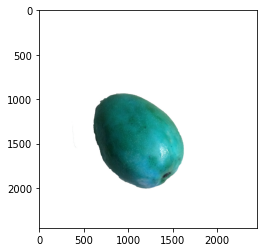

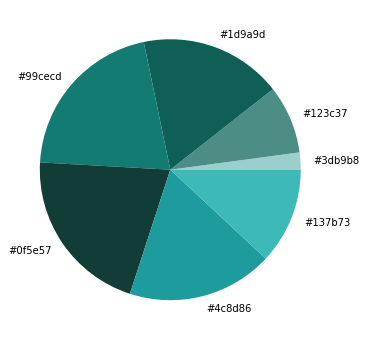

In [32]:
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn

    test_image = cv2.imread(path)
    plt.imshow(test_image)
    attr = get_colors(test_image, 8)
    show_chart(attr[1], attr[2][1:], attr[0][1:])

    hist_pred = extract_color_histogram(test_image)
    print(model.predict([hist_pred]))